# ローソクチャートの表示

ローソクチャートをmatplotlibで表示するためには、細かいパラメータの設定が必要になります。これらを設定済みのライブラリである"mplfinance"を使う例を紹介します。

---
[Google Colaboratoryで開く](https://colab.research.google.com/github/202408pythonciot/Data_Science_in_Finance/blob/main/Colaboratory/Base/candlestick_chart.ipynb)

<a target="_blank" href="https://colab.research.google.com/github/202408pythonciot/Data_Science_in_Finance/blob/main/Colaboratory/Base/candlestick_chart.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

## 1. 事前準備

### mplfinanceのインストール
Colaboratoryでは標準として入っていないため，pipを使ってmplfinanceをインストールします。

In [1]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


### 必要ライブラリのインポート

ローソクチャートを描画するためのmatplotlib，mplfinanceをインポートします。

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mpf # 金融データ表示拡張


株価履歴を取得するためにyfinanceと日付計算のためにdatetimeをインポートします。

In [3]:
import datetime as dt
import yfinance as yf


## 2. データを取得

### 取得期間の計算
datetimeモジュールを使って，今日から180日前の日付を求め，それぞれsdayとedayの変数に代入します。

In [4]:
sday = dt.datetime.today() - dt.timedelta(days=180) # 180日前の日付を計算
eday = dt.datetime.today()
sday, eday

(datetime.datetime(2024, 5, 18, 4, 30, 12, 491049),
 datetime.datetime(2024, 11, 14, 4, 30, 12, 491222))

### データの取得
ファーストリテーリングの証券コード(9983)を使って，yfinanceから今日から180日前までの期間の株価履歴を取得します。

In [5]:
ticker = "9983.T"
df = yf.download(ticker, start=sday , end=eday)
# カラムを修正 10月末からこれをやらないとローソクチャートでエラー表示
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume
Date,,,,,,
2024-05-20 00:00:00+00:00,41158.570312,41360.0,41880.0,40840.0,41030.0,1148000
2024-05-21 00:00:00+00:00,41248.132812,41450.0,41870.0,41410.0,41770.0,613400
2024-05-22 00:00:00+00:00,40481.882812,40680.0,41120.0,40550.0,41120.0,969500
2024-05-23 00:00:00+00:00,40919.742188,41120.0,41140.0,40640.0,40720.0,782000
2024-05-24 00:00:00+00:00,40113.687500,40310.0,40470.0,39860.0,40160.0,1166600
...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,48690.000000,48690.0,50830.0,48420.0,50720.0,1784300
2024-11-08 00:00:00+00:00,49250.000000,49250.0,49490.0,48940.0,49390.0,1328200
2024-11-11 00:00:00+00:00,49480.000000,49480.0,49500.0,48690.0,49050.0,710600


mplfinanceを使って株価をローソクチャートで表示します。

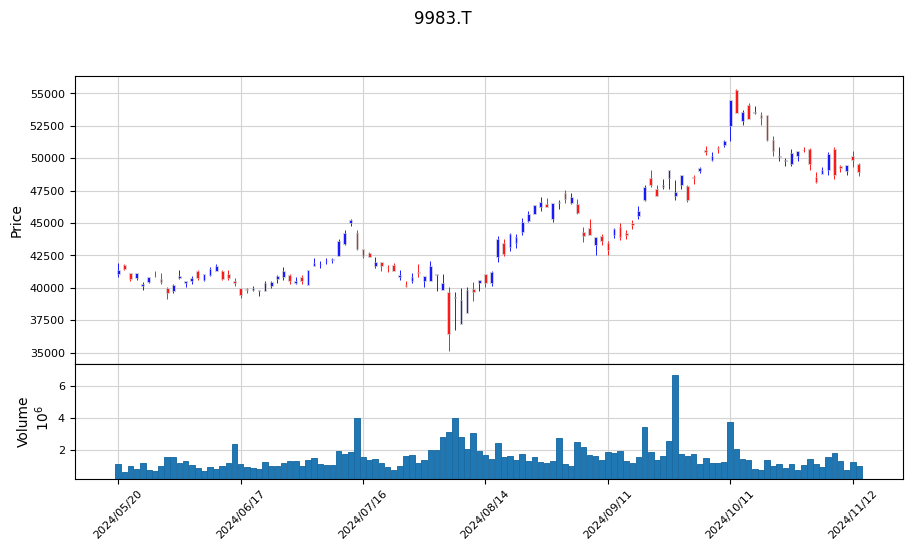

In [6]:
mpf.plot(
    df, # 表示対象
    type='candle', # ローソク足"candle"を設定
    volume=True, #出来高のグラフ表示指定 デフォルトは"False"
    show_nontrading=False, # データがない日付を表示するかどうかを指定 デフォルトは"False"
    #mav=(5, 30), # 移動平均線のプロット
    # チャート全体のスタイル設定

    style = mpf.make_mpf_style(
        marketcolors=mpf.make_marketcolors(
            up='#FF0000', # 陽線の塗りつぶし色
            down='#0000FF', # 陰線の塗りつぶし色
            edge='lightgray', # ローソクの枠線の色
            wick={ # ヒゲの色を指定
                'up':'#FF0000', # 陽線の下ヒゲの色
                'down':'#0000FF' # 陰線の下ヒゲの色
            }
        ),

        facecolor='white', # 背景色
        edgecolor='black', # 外枠色
        figcolor='white', # 外側の色
        gridcolor='lightgray', # グリッド色
        gridstyle='-', # グリッドの種類 "--":実線, "--":破線, ":":点線, "-.":破線と点線の組み合わせ
        gridaxis='both', # グリッドの有無の指定 both:縦横両方, horizontal:横のみ, vertical:縦のみ
        y_on_right=False, # y軸を右表示の指定
        rc = {
          'xtick.color': 'black', # X軸の色
          'xtick.labelsize': 8, # X軸の文字サイズ
          'ytick.color': 'black', # Y軸の色
          'ytick.labelsize': 8, # Y軸の文字サイズ
          'axes.labelsize': 10, # 軸ラベルの文字サイズ
          'axes.labelcolor': 'black', # 軸ラベルの色
          'font.family': 'IPAexGothic', # タイトル,ラベルのフォントを指定
      }
    ),

    # チャートのサイズの設定
    figratio=(20, 10), # 図のサイズ指定（縦横比）
    tight_layout=False, # 図の余白を狭する⇒True

    # 軸の設定
    datetime_format='%Y/%m/%d', # X軸の日付の表示書式を指定
    # xlim=('2021-01-01', '2021-02-01'), # X軸の日付の範囲をタプルで指定 指定無しならデータフレームを元に自動設定
    # ylim=(0, 300), # Y軸の範囲をタプルで指定 指定無しなら自動設定
    xrotation=45, # X軸の日付ラベルの回転角度を指定 デフォルトは45度
    axisoff=False, # 軸を表示するかどうかを指定 デフォルトは"False"


    # ラベルの設定
    title='9983.T', # チャートのタイトル
    ylabel='Price', # チャートのY軸ラベル
    ylabel_lower='Volume', # ボリュームを表示する場合は、ボリュームのグラフのY軸ラベル
)

移動平均線を表示するには，キーワード引数mavに移動平均区間の日数をタプル（リストでも可）を渡すことで表示されます。

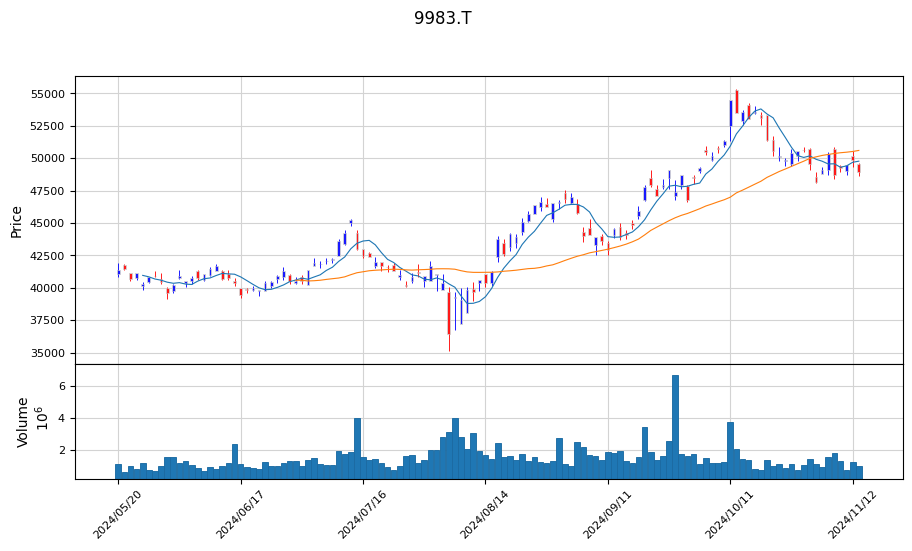

In [7]:
mpf.plot(
    df, # 表示対象
    type='candle', # ローソク足"candle"を設定
    volume=True, #出来高のグラフ表示指定 デフォルトは"False"
    show_nontrading=False, # データがない日付を表示するかどうかを指定 デフォルトは"False"
    mav=(5, 30), # 移動平均線のプロット
    # チャート全体のスタイル設定

    style = mpf.make_mpf_style(
        marketcolors=mpf.make_marketcolors(
            up='#FF0000', # 陽線の塗りつぶし色
            down='#0000FF', # 陰線の塗りつぶし色
            edge='lightgray', # ローソクの枠線の色
            wick={ # ヒゲの色を指定
                'up':'#FF0000', # 陽線の下ヒゲの色
                'down':'#0000FF' # 陰線の下ヒゲの色
            }
        ),

        facecolor='white', # 背景色
        edgecolor='black', # 外枠色
        figcolor='white', # 外側の色
        gridcolor='lightgray', # グリッド色
        gridstyle='-', # グリッドの種類 "--":実線, "--":破線, ":":点線, "-.":破線と点線の組み合わせ
        gridaxis='both', # グリッドの有無の指定 both:縦横両方, horizontal:横のみ, vertical:縦のみ
        y_on_right=False, # y軸を右表示の指定
        rc = {
          'xtick.color': 'black', # X軸の色
          'xtick.labelsize': 8, # X軸の文字サイズ
          'ytick.color': 'black', # Y軸の色
          'ytick.labelsize': 8, # Y軸の文字サイズ
          'axes.labelsize': 10, # 軸ラベルの文字サイズ
          'axes.labelcolor': 'black', # 軸ラベルの色
          'font.family': 'IPAexGothic', # タイトル,ラベルのフォントを指定
      }
    ),

    # チャートのサイズの設定
    figratio=(20, 10), # 図のサイズ指定（縦横比）
    tight_layout=False, # 図の余白を狭する⇒True

    # 軸の設定
    datetime_format='%Y/%m/%d', # X軸の日付の表示書式を指定
    # xlim=('2021-01-01', '2021-02-01'), # X軸の日付の範囲をタプルで指定 指定無しならデータフレームを元に自動設定
    # ylim=(0, 300), # Y軸の範囲をタプルで指定 指定無しなら自動設定
    xrotation=45, # X軸の日付ラベルの回転角度を指定 デフォルトは45度
    axisoff=False, # 軸を表示するかどうかを指定 デフォルトは"False"


    # ラベルの設定
    title='9983.T', # チャートのタイトル
    ylabel='Price', # チャートのY軸ラベル
    ylabel_lower='Volume', # ボリュームを表示する場合は、ボリュームのグラフのY軸ラベル
)